---
title: "Quiz_2"
author: "Gabin Lee"
date: "2023-05-21"
categories: [new, code, analysis]
image: "image.png"
---

**This notebook is an exercise in the [Geospatial Analysis](https://www.kaggle.com/learn/geospatial-analysis) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/coordinate-reference-systems).**

---


# 소개

당신은 조류 보전 전문가이며, 자주색 까마귀의 이동 패턴을 이해하고 싶습니다. 연구를 통해 이 새들이 일반적으로 여름 번식 기간 동안 미국 동부에서 보내다가 겨울에는 남아메리카로 이동한다는 것을 발견했습니다. 그러나 이 새는 멸종 위기에 처해 있으므로 이 새들이 더 자주 방문할 가능성이 있는 위치를 자세히 살펴보고 싶습니다.

<center>
<img src="https://storage.googleapis.com/kaggle-media/learn/images/qQcS0KM.png" width="1000"><br/>
</center>

남아메리카에는 여러 보호 지역이 있으며, 이곳은 이곳으로 이동하거나 거주하는 종들이 번성할 수 있는 최상의 기회를 제공하기 위해 특별한 규정에 따라 운영됩니다. 자주색 까마귀가 이러한 지역을 방문하는 경향이 있는지 알고 싶습니다. 이 질문에 대답하기 위해 최근에 수집된 11마리의 다른 새의 연중 위치를 추적하는 데이터를 사용할 것입니다.

시작하기 전에 아래의 코드 셀을 실행하여 모든 설정을 완료하세요.

In [1]:
import pandas as pd
import geopandas as gpd

from shapely.geometry import LineString
import matplotlib.pyplot as plt

In [ ]:
# from learntools.core import binder
# binder.bind(globals())
# from learntools.geospatial.ex2 import *

# 연습문제

### 1) 데이터 불러오기

다음 코드 셀을 실행하여 GPS 데이터를 pandas DataFrame인 birds_df에 로드하세요.  

In [7]:
# Load the data and print the first 5 rows
birds_df = pd.read_csv("archive_2/purple_martin.csv", parse_dates=['timestamp'])
print("There are {} different birds in the dataset.".format(birds_df["tag-local-identifier"].nunique()))
birds_df.head()

There are 11 different birds in the dataset.


,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448


데이터 세트에는 "tag-local-identifier" 열에서 고유한 값으로 식별되는 11마리의 새가 있습니다. 각 새는 연중 다른 시기에 수집된 여러 측정값을 가지고 있습니다.

다음 코드 셀을 사용하여 GeoDataFrame인 birds를 생성하세요.

birds는 birds_df의 모든 열을 포함해야 합니다. 또한 (경도, 위도) 위치를 포함하는 Point 객체를 담고 있는 "geometry" 열이 있어야 합니다.
birds의 좌표 기준계(CRS)를 {'init': 'epsg:4326'}로 설정하세요.

In [8]:
# Your code here: Create the GeoDataFrame
birds = gpd.GeoDataFrame(birds_df,geometry=gpd.points_from_xy(birds_df['location-long'],birds_df["location-lat"]))

# Your code here: Set the CRS to {'init': 'epsg:4326'}
birds.crs = {'init': 'epsg:4326'}

# Check your answer
#q_1.check()

c:\Users\leegabin\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
# Lines below will give you a hint or solution code
#q_1.hint()
#q_1.solution()

### 2) 데이터 시각화하기

다음으로, GeoPandas에서 `'naturalearth_lowres'`  데이터 세트를 불러와 `americas` 를 설정합니다. `americas` 는 (북아메리카와 남아메리카 모두를 포함하는) 전체 아메리카 대륙의 국가 경계를 담고 있는 GeoDataFrame입니다. 변경하지 말고 다음 코드 셀을 실행하세요.

In [9]:
# Load a GeoDataFrame with country boundaries in North/South America, print the first 5 rows
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world['continent'].isin(['North America', 'South America'])]
americas.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
16,11263077.0,North America,Haiti,HTI,14332,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."


다음 코드 셀을 사용하여 `americas` GeoDataFrame의 국가 경계와 `birds_gdf` GeoDataFrame의 모든 점을 함께 보여주는 단일 플롯을 생성하세요.

여기서 특별한 스타일링에 대해 걱정하지 마세요. 데이터가 올바르게 로드되었는지 빠른 확인을 위해 예비 플롯을 만들기만 하면 됩니다. 특히 새들을 구분하기 위해 점에 색상을 부여하거나 시작점과 종료점을 구분할 필요는 없습니다. 이를 연습문제의 다음 부분에서 처리하겠습니다.

<AxesSubplot:>

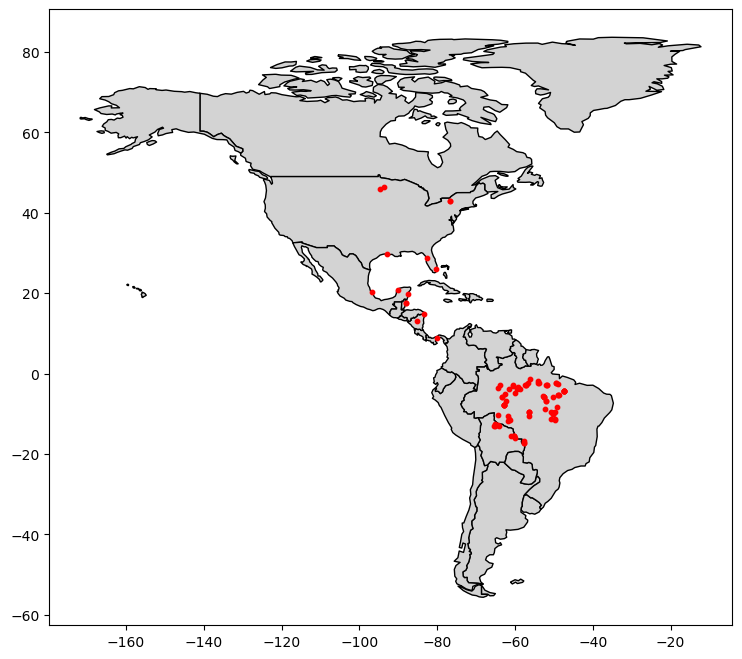

In [14]:
# Your code here
fig,ax = plt.subplots(figsize=(12, 8))
americas.plot(ax=ax, color='lightgray', edgecolor='black')
birds.plot(ax=ax, color='red', markersize=10)

# Uncomment to see a hint
#q_2.hint()

In [ ]:
# Get credit for your work after you have created a map
#q_2.check()

# Uncomment to see our solution (your code may look different!)
##q_2.solution()

### 3) 각 새가 여행을 시작하고 끝내는 위치는 어디인가요? (Part 1)

이제 각 새의 경로를 더 자세히 살펴볼 준비가 되었습니다. 다음 코드 셀을 실행하여 두 개의 GeoDataFrame을 생성하세요:

- `path_gdf` 는 각 새의 경로를 보여주는 LineString 객체를 담고 있습니다. `LineString()` 메서드를 사용하여 Point 객체의 리스트에서 LineString 객체를 생성합니다.
- `start_gdf` 는 각 새의 시작점을 담고 있습니다.

In [15]:
# GeoDataFrame showing path for each bird
path_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
path_gdf.crs = {'init' :'epsg:4326'}

# GeoDataFrame showing starting point for each bird
start_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
start_gdf.crs = {'init' :'epsg:4326'}

# Show first five rows of GeoDataFrame
start_gdf.head()

c:\Users\leegabin\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\leegabin\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,tag-local-identifier,geometry
0,30048,POINT (-90.12992 20.73242)
1,30054,POINT (-93.60861 46.50563)
2,30198,POINT (-80.31036 25.92545)
3,30263,POINT (-76.78146 42.99209)
4,30275,POINT (-76.78213 42.99207)


다음 코드 셀을 사용하여 각 새의 최종 위치를 포함하는 GeoDataFrame인 `end_gdf` 를 생성하세요.

- 형식은 `start_gdf` 와 동일해야 하며, "tag-local-identifier"와 "geometry"라는 두 개의 열을 가져야 합니다. "geometry" 열에는 Point 객체가 포함되어야 합니다.
- `end_gdf` 의 좌표 기준계(CRS)를 {'init': 'epsg:4326'}로 설정하세요.

In [16]:
# Your code here
end_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_df, geometry=end_df.geometry)
end_gdf.crs = {'init': 'epsg:4326'}
print(end_gdf.head())

# Check your answer
#q_3.check()

   tag-local-identifier                     geometry
0                 30048   POINT (-47.53632 -4.43758)
1                 30054   POINT (-62.47914 -5.03840)
2                 30198   POINT (-57.46417 -2.77617)
3                 30263   POINT (-50.19230 -5.70504)
4                 30275  POINT (-57.70404 -16.72336)


c:\Users\leegabin\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
# Lines below will give you a hint or solution code
#q_3.hint()
#q_3.solution()

### 4) 각 새가 여행을 시작하고 끝내는 위치는 어디인가요? (Part 2)

위의 문제에서 얻은 GeoDataFrame(`path_gdf`, `start_gdf`, `end_gdf`)를 사용하여 모든 새의 경로를 한 지도에 시각화하세요. `americas` GeoDataFrame도 사용할 수 있습니다.

<AxesSubplot:>

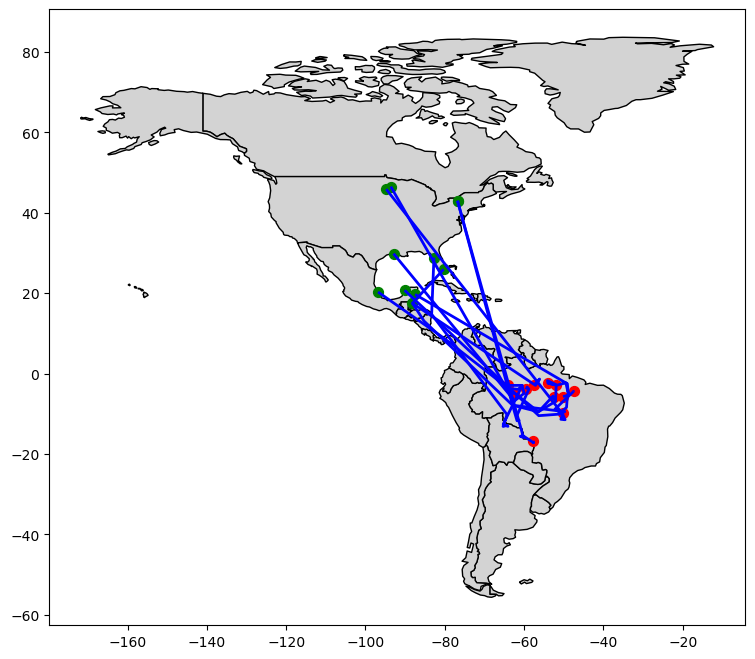

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))

americas.plot(ax=ax, color='lightgray', edgecolor='black')

path_gdf.plot(ax=ax, color='blue', linewidth=2)

start_gdf.plot(ax=ax, color='green', markersize=50, label='Start')
end_gdf.plot(ax=ax, color='red', markersize=50, label='End')

# Uncomment to see a hint
#q_4.hint()

In [ ]:
# Get credit for your work after you have created a map
#q_4.check()

# Uncomment to see our solution (your code may look different!)
#q_4.solution()

### 5) 남아메리카의 보호 지역은 어디에 있나요? (Part 1)

모든 새들이 남아메리카 어딘가에서 끝나는 것 같습니다. 그러나 그들은 보호 지역을 방문하고 있는 걸까요?

다음 코드 셀에서는 남아메리카에 있는 모든 보호 지역의 위치를 포함하는 GeoDataFrame `protected_areas` 를 생성합니다. 해당 shapefile은 `protected_filepath` 에 위치해 있습니다.

In [20]:
# Path of the shapefile to load
protected_filepath = "archive_2/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shp"

# Your code here
protected_areas = gpd.read_file(protected_filepath)
protected_areas.head()

# Check your answer
#q_5.check()

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,GOV_TYPE,OWN_TYPE,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,geometry
0,14067.0,14067,1,Het Spaans Lagoen,Het Spaans Lagoen,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,Not Reported,...,Not Reported,Not Reported,Not Reported,Management plan is not implemented and not ava...,State Verified,1856,Not Reported,NLD,ABW,"POLYGON ((-69.97523 12.47379, -69.97523 12.473..."
1,14003.0,14003,1,Bubali Pond Bird Sanctuary,Bubali Pond Bird Sanctuary,Bird Sanctuary,Bird Sanctuary,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,Not Reported,Not Reported,State Verified,1899,Not Reported,NLD,ABW,"POLYGON ((-70.04734 12.56329, -70.04615 12.563..."
2,555624439.0,555624439,1,Arikok National Park,Arikok National Park,National Park,National Park,National,Not Reported,Not Applicable,...,Non-profit organisations,Non-profit organisations,Fundacion Parke Nacional Arikok,Not Reported,State Verified,1899,Not Reported,NLD,ABW,"MULTIPOLYGON (((-69.96302 12.48384, -69.96295 ..."
3,303894.0,303894,1,Madidi,Madidi,Area Natural de Manejo Integrado,Natural Integrated Management Area,National,Not Reported,Not Applicable,...,Federal or national ministry or agency,Not Reported,Not Reported,Not Reported,State Verified,1860,BO-L,BOL,BOL,"POLYGON ((-68.59060 -14.43388, -68.59062 -14.4..."
4,303893.0,303893,1,Apolobamba,Apolobamba,Area Natural de Manejo Integado Nacional,National Natural Integrated Management Area,National,Not Reported,Not Applicable,...,Federal or national ministry or agency,Not Reported,Not Reported,Not Reported,State Verified,1860,BO-L,BOL,BOL,"POLYGON ((-69.20949 -14.73334, -69.20130 -14.7..."


In [ ]:
# Lines below will give you a hint or solution code
#q_5.hint()
#q_5.solution()

### 6) 남아메리카의 보호 지역은 어디에 있나요? (Part 2)

`protected_areas` GeoDataFrame을 사용하여 남아메리카의 보호 지역의 위치를 보여주는 플롯을 생성하세요. (육지에 위치한 보호 지역과 해양에서의 보호 지역이 있는 것을 알게 될 것입니다.)

<AxesSubplot:>

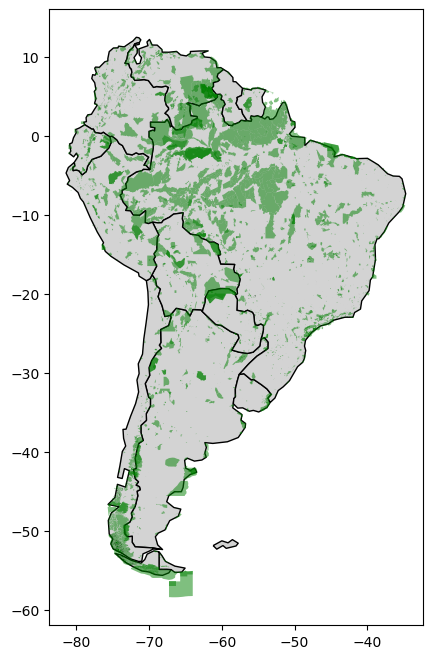

In [25]:
# Country boundaries in South America
south_america = americas.loc[americas['continent']=='South America']

south_america_protected_areas = protected_areas[protected_areas.intersects(south_america.unary_union)]

fig, ax = plt.subplots(figsize=(12, 8))

south_america.plot(ax=ax, color='lightgray', edgecolor='black')

south_america_protected_areas.plot(ax=ax, color='green', alpha=0.5)

# Uncomment to see a hint
#q_6.hint()

In [ ]:
# Get credit for your work after you have created a map
#q_6.check()

# Uncomment to see our solution (your code may look different!)
#q_6.solution()

### 7) 남아메리카의 어느 정도가 보호되고 있는가요?

새들에게 적합한 남아메리카의 면적 비율을 알아보기 위해 남아메리카의 어느 정도가 보호되고 있는지 알아보고 싶습니다.

첫 번째 단계로, 남아메리카에서 보호 받는 모든 땅의 총 면적(해양 지역 제외)을 계산합니다. 이를 위해 각각 제곱 킬로미터로 표시된 "REP_AREA"와 "REP_M_AREA" 열을 사용합니다.

아래 코드 셀을 변경하지 말고 실행하세요.

In [26]:
P_Area = sum(protected_areas['REP_AREA']-protected_areas['REP_M_AREA'])
print("South America has {} square kilometers of protected areas.".format(P_Area))

South America has 5396761.9116883585 square kilometers of protected areas.


그런 다음, 계산을 완료하기 위해 `south_america` GeoDataFrame을 사용합니다.

In [27]:
south_america.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
20,3398.0,South America,Falkland Is.,FLK,282,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."
28,3461734.0,South America,Uruguay,URY,56045,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1..."
29,211049527.0,South America,Brazil,BRA,1839758,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."


다음 단계를 따라 남아메리카의 총 면적을 계산하세요:

- 각 국가의 면적을 다각형의 `area` 속성을 사용하여 계산하고 결과를 더하세요. 계산된 면적은 제곱 미터 단위입니다.
- 답을 제곱 킬로미터 단위로 변환하세요.

In [28]:
# Your code here: Calculate the total area of South America (in square kilometers)
totalArea = sum(south_america.geometry.to_crs(epsg=3035).area)/10**6
totalArea

# Check your answer
#q_7.check()

17759005.81506123

In [ ]:
# Lines below will give you a hint or solution code
#q_7.hint()
#q_7.solution()

아래의 코드 셀을 실행하여 남아메리카의 보호 비율을 계산하세요.

In [29]:
# What percentage of South America is protected?
percentage_protected = P_Area/totalArea
print('Approximately {}% of South America is protected.'.format(round(percentage_protected*100, 2)))

Approximately 30.39% of South America is protected.


### 8) 남아메리카에 있는 새들은 어디에 있나요?

그렇다면 새들은 보호 지역에 있을까요?

남아메리카에서 발견된 모든 새들의 위치와 남아메리카의 모든 보호 지역의 위치를 보여주는 플롯을 생성하세요.

순전히 해양 지역(육지 구성 요소가 없는 경우)인 보호 지역을 제외하려면 "MARINE" 열을 사용하고, `protected_areas` GeoDataFrame의 모든 행이 아니라 `protected_areas[protected_areas['MARINE']!='2']`의 행만 플롯에 나타내면 됩니다.

<AxesSubplot:>

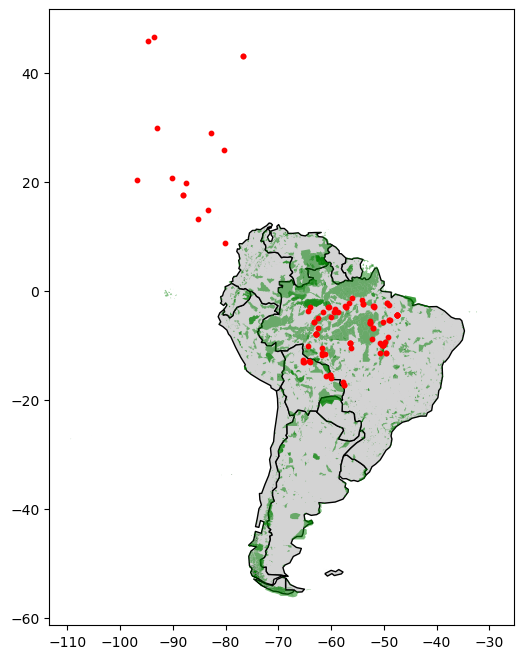

In [30]:
# Your code here
fig, ax = plt.subplots(figsize=(12, 8))

south_america.plot(ax=ax, color='lightgray', edgecolor='black')

protected_areas[protected_areas['MARINE'] != '2'].plot(ax=ax, color='green', alpha=0.5)

birds.plot(ax=ax, color='red', markersize=10)

# Uncomment to see a hint
#q_8.hint()

In [ ]:
# Get credit for your work after you have created a map
# q_8.check()

# Uncomment to see our solution (your code may look different!)
#q_8.solution()

# Keep going

Create stunning **[interactive maps](https://www.kaggle.com/alexisbcook/interactive-maps)** with your geospatial data.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/geospatial-analysis/discussion) to chat with other learners.*